In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Data read and prepare

data = pd.read_csv('../maman11/fixed_table.csv')
age_bins = [0,35,55,70]
data['age_binned'] = pd.cut(data['גיל הנבדק'], age_bins)

data.drop(columns=['מס’', 'גיל הנבדק'],inplace = True)
data

# This is the same data from maman 11

,משקל,תזונה,ספורט,מצב סוציואקונומי,age_binned
0,גבוה,רגילה,ל,נמוך,"(55, 70]"
1,גבוה,רגילה,כ,גבוה,"(55, 70]"
2,גבוה,צמחונית,ל,נמוך,"(0, 35]"
3,תקין,רגילה,כ,גבוה,"(55, 70]"
4,נמוך,צמחונית,כ,גבוה,"(55, 70]"
5,נמוך,רגילה,ל,נמוך,"(35, 55]"
6,נמוך,צמחונית,כ,גבוה,"(55, 70]"
7,תקין,צמחונית,ל,נמוך,"(0, 35]"
8,נמוך,רגילה,ל,גבוה,"(35, 55]"
9,תקין,רגילה,כ,גבוה,"(55, 70]"


In [3]:
# Build the similarity matrix.
# Because the data is mostly nonimal, jaccard index was chosen.
# further improvement might be achieved with dealing weight/social status/age as Ordinal, but the results were satisfied.

def jaccard_index(x,y, features_num = 5.):
    return ((features_num-(x==y).sum())/features_num)

data_similarity = pd.DataFrame(np.tril(squareform(pdist(data,jaccard_index))), index=range(14), columns=range(14))
data_similarity = pd.DataFrame(np.where(data_similarity==0., np.nan, data_similarity))
data_similarity.iloc[6,4] = 0. # Fix misplace NaN
data_similarity.iloc[9,3] = 0. # Fix misplace NaN
data_similarity

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.4,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.6,0.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.8,0.4,0.8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.4,0.8,0.6,0.8,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.8,0.4,0.8,0.4,0.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.6,1.0,0.2,0.8,0.8,0.6,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.6,0.6,0.8,0.6,0.6,0.2,0.6,0.8,NaN,NaN,NaN,NaN,NaN,NaN
9,0.6,0.2,1.0,0.0,0.4,0.8,0.4,0.8,0.6,NaN,NaN,NaN,NaN,NaN


In [4]:
data_dummies = pd.get_dummies(data)
data_dummies

,משקל_גבוה,משקל_נמוך,משקל_תקין,תזונה_צמחונית,תזונה_רגילה,ספורט_כ,ספורט_ל,מצב סוציואקונומי_גבוה,מצב סוציואקונומי_נמוך,"age_binned_(0, 35]","age_binned_(35, 55]","age_binned_(55, 70]"
0,1,0,0,0,1,0,1,0,1,0,0,1
1,1,0,0,0,1,1,0,1,0,0,0,1
2,1,0,0,1,0,0,1,0,1,1,0,0
3,0,0,1,0,1,1,0,1,0,0,0,1
4,0,1,0,1,0,1,0,1,0,0,0,1
5,0,1,0,0,1,0,1,0,1,0,1,0
6,0,1,0,1,0,1,0,1,0,0,0,1
7,0,0,1,1,0,0,1,0,1,1,0,0
8,0,1,0,0,1,0,1,1,0,0,1,0
9,0,0,1,0,1,1,0,1,0,0,0,1


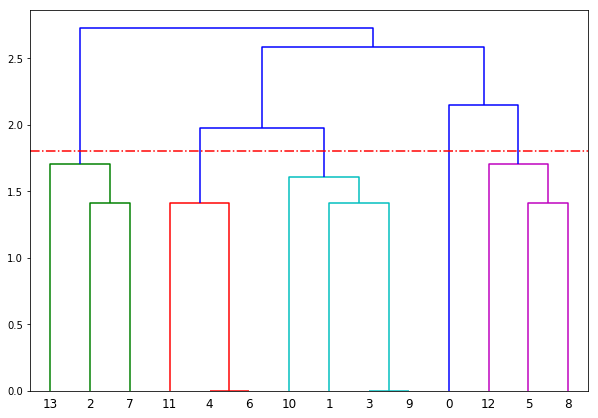

In [5]:
# The dendrogram tree was built agglomerative (AGNES) from the leafs to the top. 
# the tree was built with single-linked  approach based on jaccard index for similarity (* see remark below)

linked = linkage(data_dummies, method='average')

labelList = range(len(data_dummies))

plt.figure(figsize=(10, 7))  
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)

plt.axhline(1.8, color = 'r', linestyle = '-.')
plt.show()


# Remark: data dummies with 'average' method is equivalent to jaccard index with single-linkage
# it can be seen in the dendrogram. The dummies is for compability with the scipy implementation.

# we can see for example that recrods 4 and 6 have 0 distance in 'step 0' and they are clustered together.
# on the next step , record 11 is joined to them ( distance 0.2 ) , and so on...
#
# we can also see the same join in records 3,9. they are labeled as well 'Step 0' ,
# but it is clear the algorithm build them in several steps.
# on the next step  , record 1 is joined to them ( distance 0.2 ) ,
# after that , record 10 is connected to (1,3,9) , also with distance 0.2 from them. and so on...

In [ ]:
# A brief on the clusters created, in order to select the stop criterion.

In [34]:
data.iloc[[13,2,7]]

,משקל,תזונה,ספורט,מצב סוציואקונומי,age_binned
13,תקין,צמחונית,כ,נמוך,"(0, 35]"
2,גבוה,צמחונית,ל,נמוך,"(0, 35]"
7,תקין,צמחונית,ל,נמוך,"(0, 35]"


In [19]:
data.iloc[[11,4,6]]

,משקל,תזונה,ספורט,מצב סוציואקונומי,age_binned
11,תקין,צמחונית,כ,גבוה,"(55, 70]"
4,נמוך,צמחונית,כ,גבוה,"(55, 70]"
6,נמוך,צמחונית,כ,גבוה,"(55, 70]"


In [20]:
data.iloc[[10,1,3,9]]

,משקל,תזונה,ספורט,מצב סוציואקונומי,age_binned
10,תקין,רגילה,כ,גבוה,"(35, 55]"
1,גבוה,רגילה,כ,גבוה,"(55, 70]"
3,תקין,רגילה,כ,גבוה,"(55, 70]"
9,תקין,רגילה,כ,גבוה,"(55, 70]"


In [32]:
data.iloc[[12,5,8]]

,משקל,תזונה,ספורט,מצב סוציואקונומי,age_binned
12,גבוה,רגילה,ל,גבוה,"(35, 55]"
5,נמוך,רגילה,ל,נמוך,"(35, 55]"
8,נמוך,רגילה,ל,גבוה,"(35, 55]"


In [ ]:
# As we can see from the clusters created, a good stop criterion for the dendrogram would be after STEP 2,
# (marked in the dendrogram with red dashed line) 